In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("D:\Fyenlab\Project2\EV_Segmentaiton_Income\DataSets\EV_Dataset_2014_2023.csv")
print(df.head(30))
print(df['State'].nunique())  # Count of unique states


<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\srira\AppData\Local\Temp\ipykernel_21180\1558661704.py:1: SyntaxWarning: invalid escape sequence '\F'
  df = pd.read_csv("D:\Fyenlab\Project2\EV_Segmentaiton_Income\DataSets\EV_Dataset_2014_2023.csv")


    Year Month_Name        Date              State  \
0   2014        jan  01-01-2014     Andhra Pradesh   
1   2014        jan  01-01-2014     Andhra Pradesh   
2   2014        jan  01-01-2014     Andhra Pradesh   
3   2014        jan  01-01-2014     Andhra Pradesh   
4   2014        jan  01-01-2014     Andhra Pradesh   
5   2014        jan  01-01-2014     Andhra Pradesh   
6   2014        jan  01-01-2014     Andhra Pradesh   
7   2014        jan  01-01-2014     Andhra Pradesh   
8   2014        jan  01-01-2014     Andhra Pradesh   
9   2014        jan  01-01-2014     Andhra Pradesh   
10  2014        jan  01-01-2014     Andhra Pradesh   
11  2014        jan  01-01-2014     Andhra Pradesh   
12  2014        jan  01-01-2014     Andhra Pradesh   
13  2014        jan  01-01-2014     Andhra Pradesh   
14  2014        jan  01-01-2014     Andhra Pradesh   
15  2014        jan  01-01-2014     Andhra Pradesh   
16  2014        jan  01-01-2014     Andhra Pradesh   
17  2014        jan  01-01-2

In [3]:
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().reset_index()
state_sales.columns = ['State', 'Total_EV_Sales']


In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
state_sales['Cluster'] = kmeans.fit_predict(state_sales[['Total_EV_Sales']])


D:\software_downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


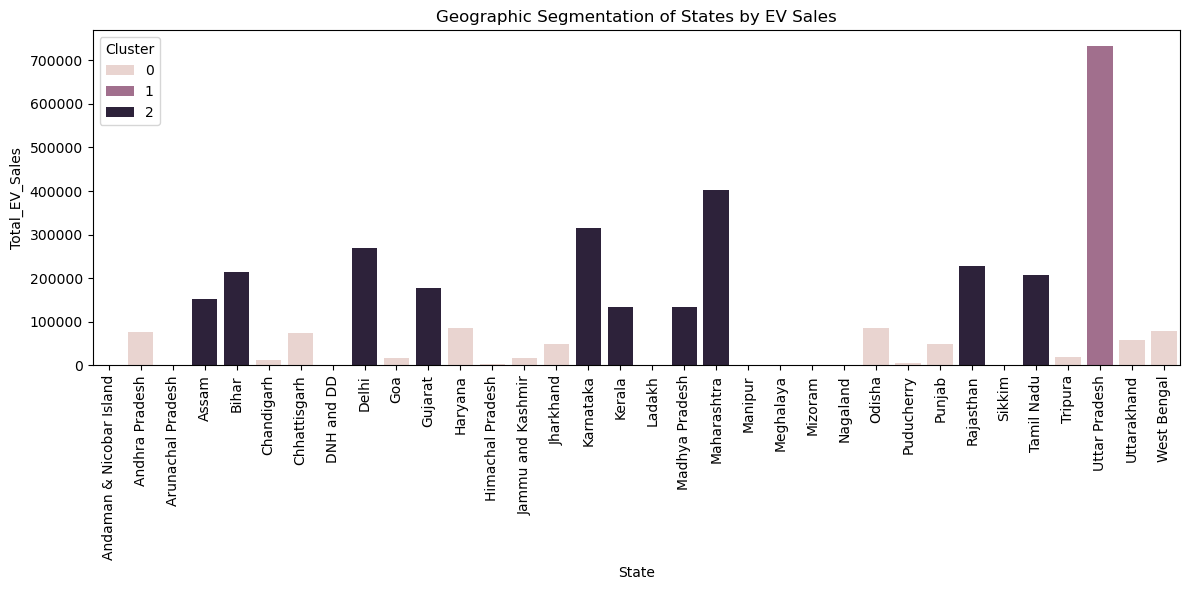

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(data=state_sales, x='State', y='Total_EV_Sales', hue='Cluster')
plt.xticks(rotation=90)
plt.title('Geographic Segmentation of States by EV Sales')
plt.tight_layout()
plt.show()


In [6]:
total_sales = df['EV_Sales_Quantity'].sum()
print(f"Estimated Market Size (2014 onward): {total_sales} units")


Estimated Market Size (2014 onward): 3593811 units


In [7]:
df['Year'] = df['Year'].astype(int)
df['EV_Sales_Quantity'] = pd.to_numeric(df['EV_Sales_Quantity'], errors='coerce')
df.dropna(subset=['EV_Sales_Quantity'], inplace=True)

Text(0.5, 1.0, 'Top States EV Sales Over Years')

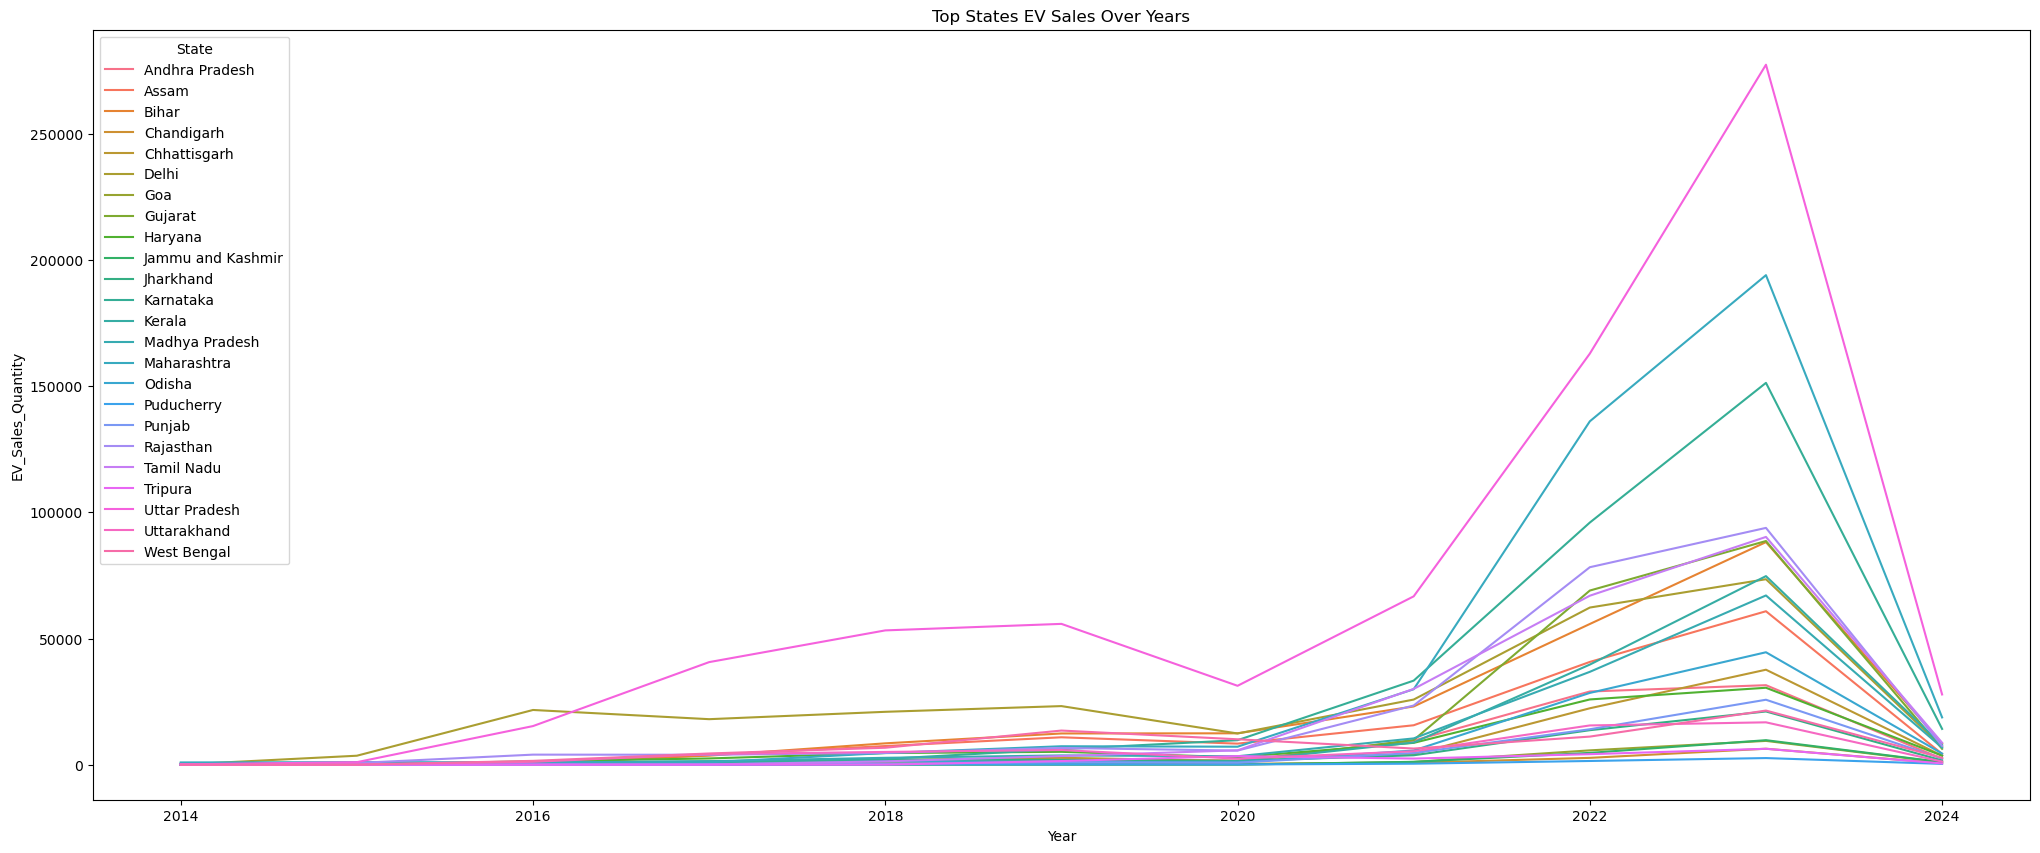

In [8]:
yearly_sales = df.groupby(['Year', 'State'])['EV_Sales_Quantity'].sum().reset_index()
top_states = yearly_sales.groupby('State')['EV_Sales_Quantity'].sum().nlargest(24).index
filtered_sales = yearly_sales[yearly_sales['State'].isin(top_states)]
plt.figure(figsize=(25, 10))
sns.lineplot(data=filtered_sales, x='Year', y='EV_Sales_Quantity', hue='State')
plt.title('Top States EV Sales Over Years')


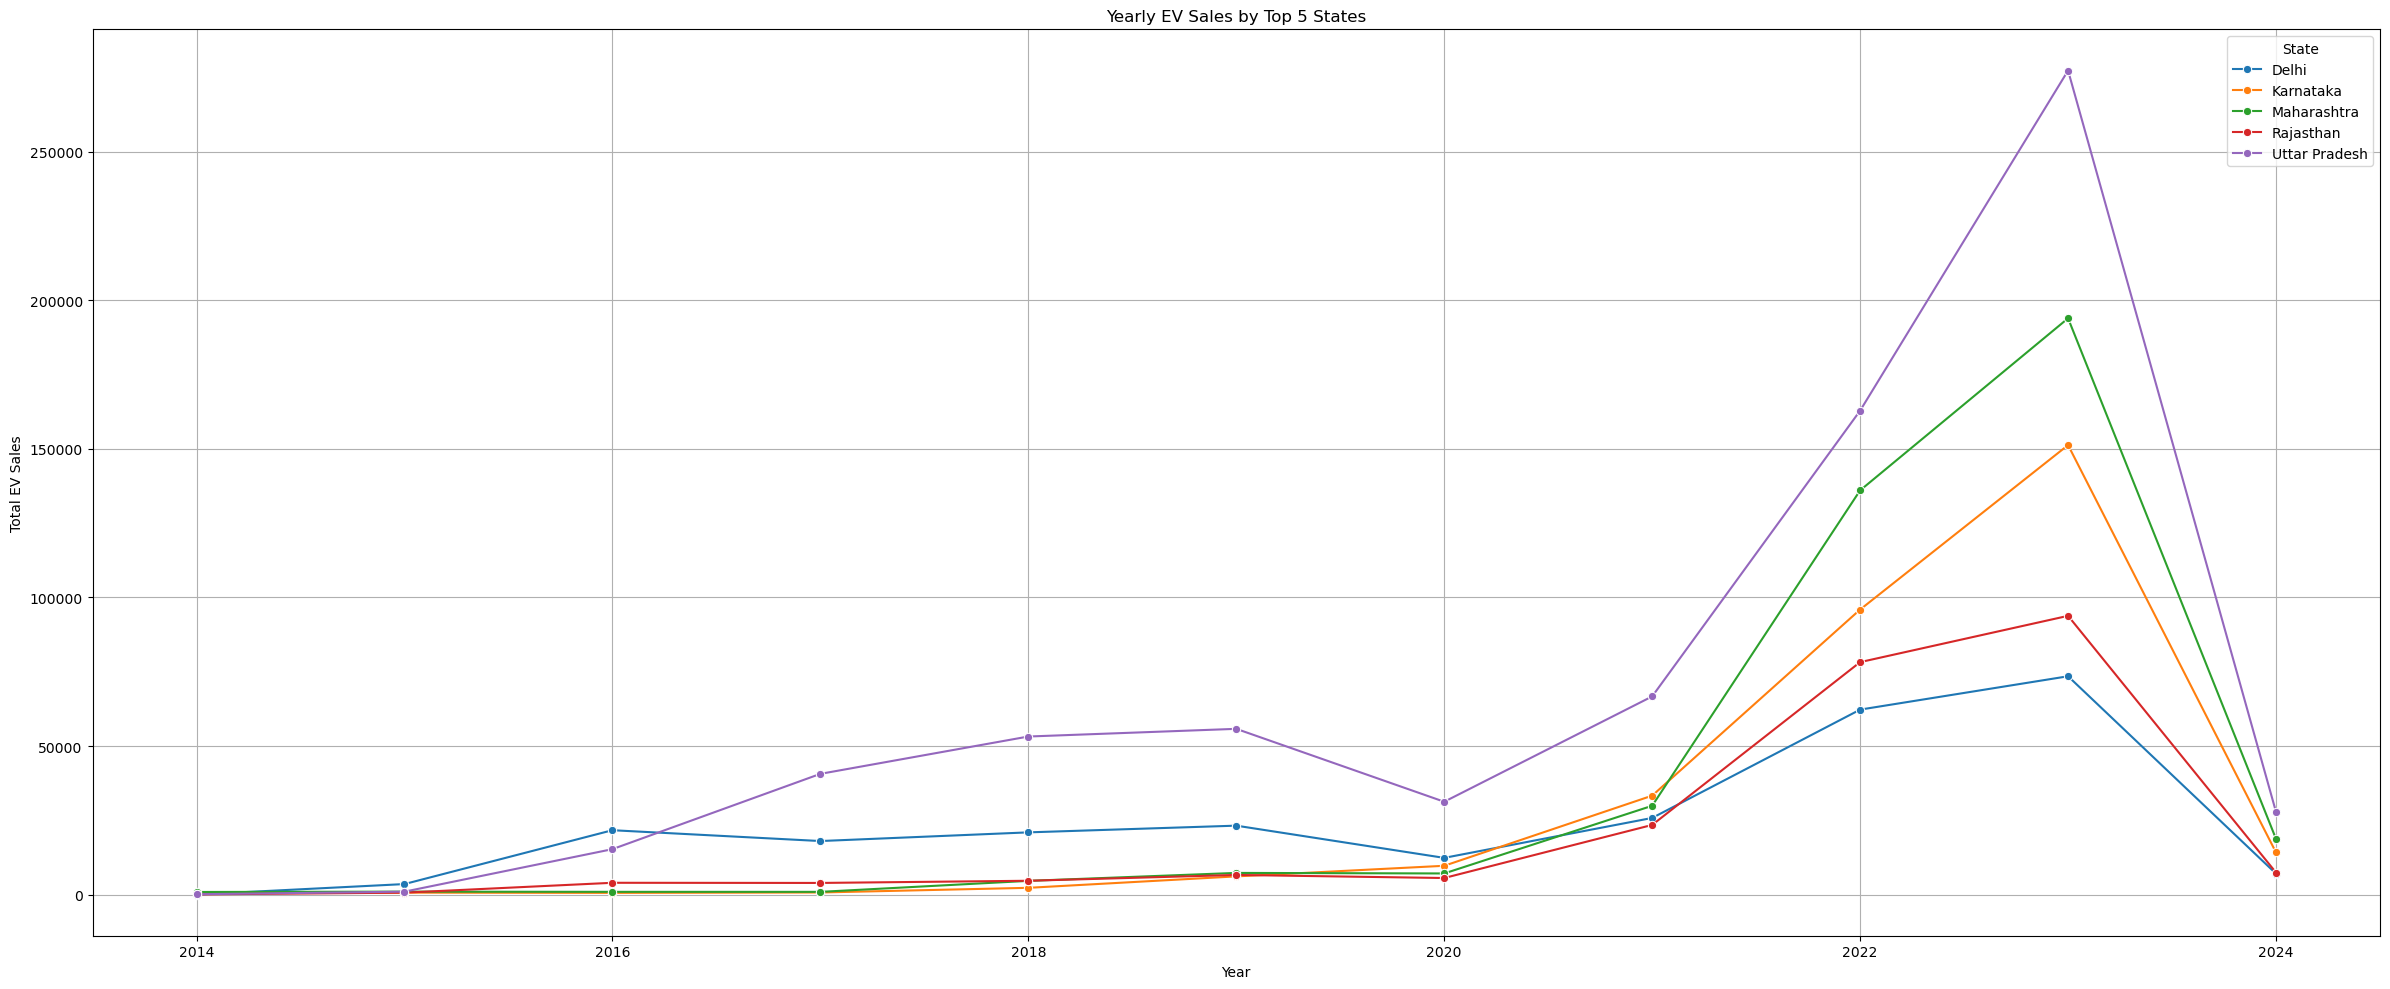

In [9]:
yearly_sales = df.groupby(['Year', 'State'])['EV_Sales_Quantity'].sum().reset_index()
top_states = yearly_sales.groupby('State')['EV_Sales_Quantity'].sum().nlargest(5).index
filtered_sales = yearly_sales[yearly_sales['State'].isin(top_states)]
plt.figure(figsize=(24, 10))
sns.lineplot(data=filtered_sales, x='Year', y='EV_Sales_Quantity', hue='State', marker='o')
plt.title('Yearly EV Sales by Top 5 States')
plt.ylabel('Total EV Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


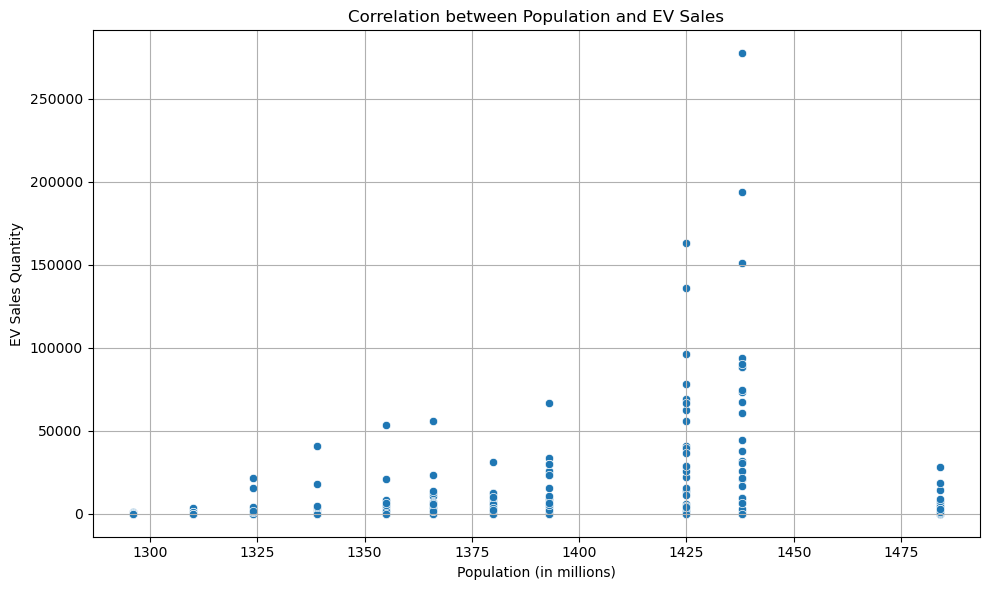

Pearson correlation coefficient: 0.29


In [10]:
# Define population data (in millions)
population_data = {
    2014: 1296,
    2015: 1310,
    2016: 1324,
    2017: 1339,
    2018: 1355,
    2019: 1366,
    2020: 1380,
    2021: 1393,
    2022: 1425,
    2023: 1438,
    2024: 1484
}

# Create a DataFrame from the population data
population_df = pd.DataFrame(list(population_data.items()), columns=['Year', 'Population'])

# Merge with your existing yearly EV sales data
yearly_sales = pd.merge(yearly_sales, population_df, on='Year', how='left')

# Plot the correlation between Population and EV Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_sales, x='Population', y='EV_Sales_Quantity')
plt.title('Correlation between Population and EV Sales')
plt.xlabel('Population (in millions)')
plt.ylabel('EV Sales Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and display the Pearson correlation coefficient
correlation = yearly_sales['Population'].corr(yearly_sales['EV_Sales_Quantity'])
print(f"Pearson correlation coefficient: {correlation:.2f}")


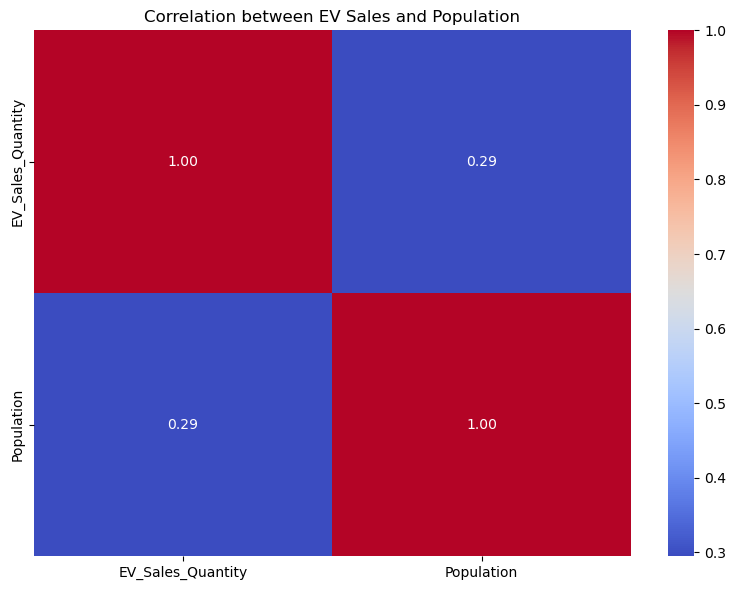

In [11]:
correlation_matrix = yearly_sales[['EV_Sales_Quantity', 'Population']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between EV Sales and Population')
plt.tight_layout()
plt.show()

In [12]:
model = LinearRegression()
predicted_rows = []

for state in top_states:
    state_data = filtered_sales[filtered_sales['State'] == state]
    X = state_data[['Year']]
    y = state_data['EV_Sales_Quantity']
    model.fit(X, y)
    pred_2025 = model.predict([[2025]])
    predicted_rows.append({'Year': 2025, 'State': state, 'EV_Sales_Quantity': int(pred_2025[0])})



D:\software_downloads\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\software_downloads\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\software_downloads\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\software_downloads\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\software_downloads\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
# Create a DataFrame for predictions
predicted_df = pd.DataFrame(predicted_rows)

In [14]:
# Combine actual and predicted data
combined_df = pd.concat([filtered_sales, predicted_df], ignore_index=True)

<Axes: xlabel='Year', ylabel='EV_Sales_Quantity'>

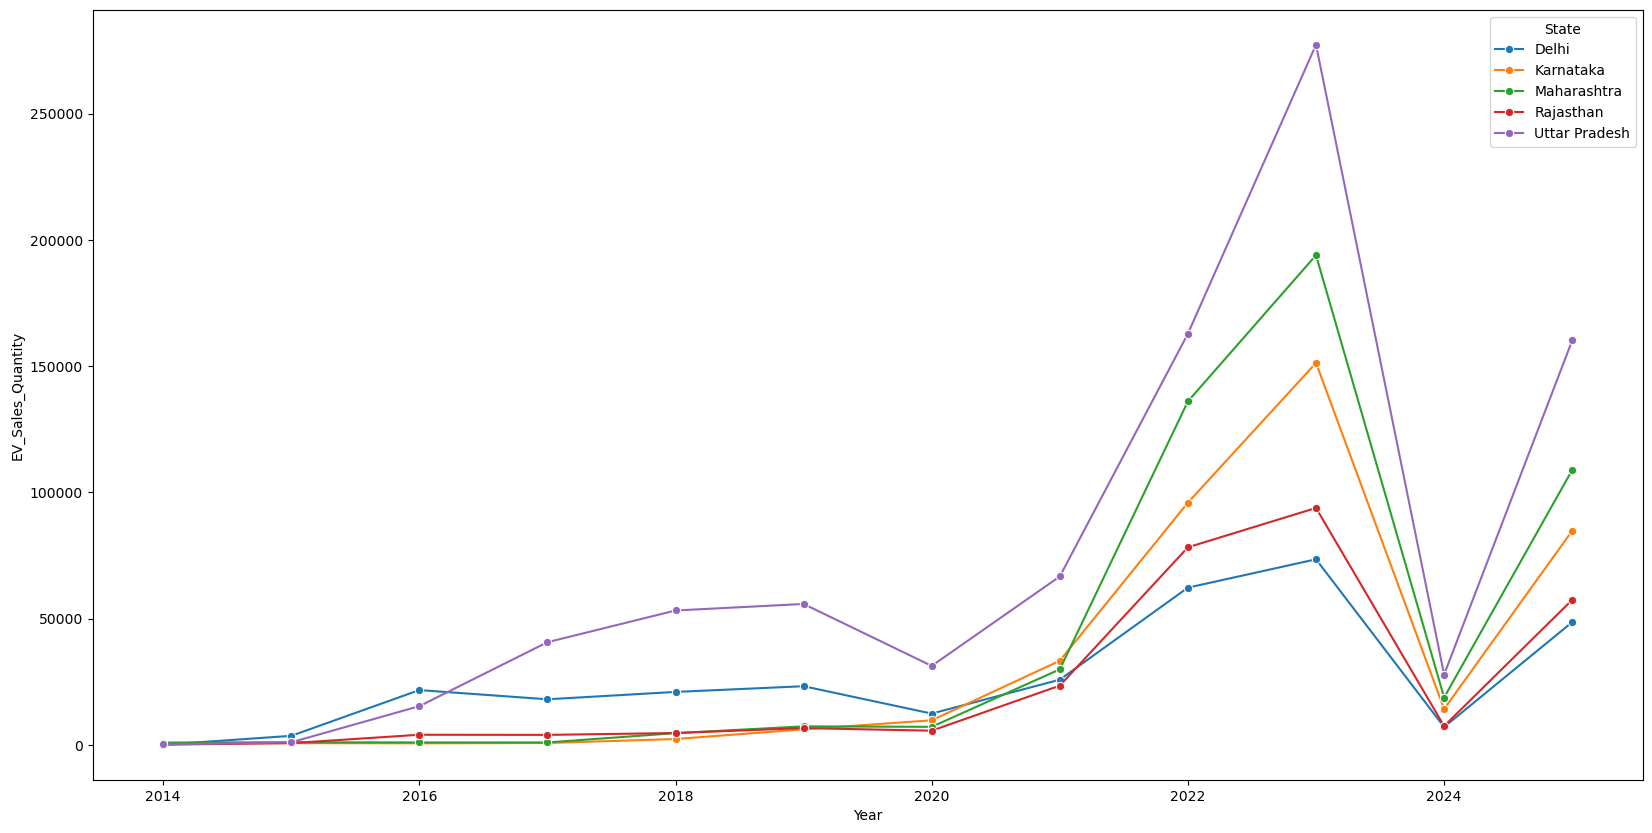

In [15]:
# Plot
plt.figure(figsize=(20, 10))
sns.lineplot(data=combined_df, x='Year', y='EV_Sales_Quantity', hue='State', marker='o')

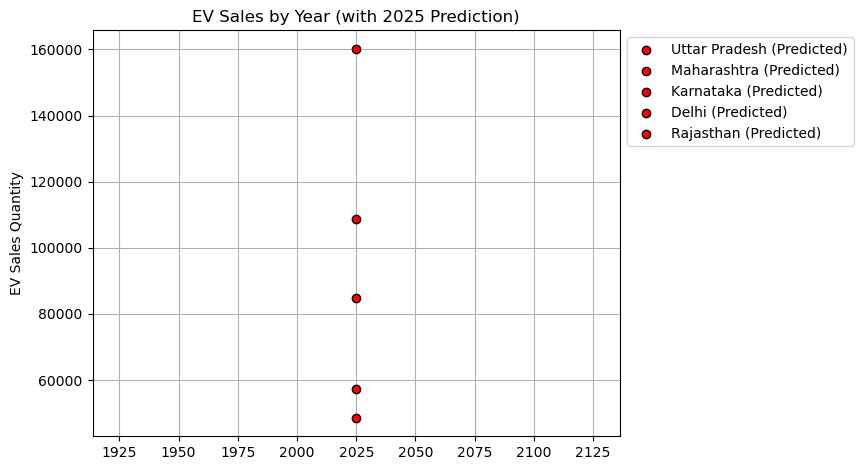

In [16]:
# Highlight predicted points
for state in top_states:
    y_val = predicted_df[predicted_df['State'] == state]['EV_Sales_Quantity'].values[0]
    plt.scatter(2025, y_val, color='red', label=f'{state} (Predicted)', edgecolors='black', zorder=5)

plt.title('EV Sales by Year (with 2025 Prediction)')
plt.ylabel('EV Sales Quantity')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [21]:
df_2 = pd.read_csv("D:\Fyenlab\Project2\EV_Segmentaiton_Income\DataSets\ev_sales_15-24.csv")
print(df_2.head(30))

    Cat                             Maker  2015  2016  2017  2018  2019  2020  \
0    3W       "VOLVO GROUP INDIA PVT LTD"     0     0    31    12     0     0   
1    3W            3EV INDUSTRIES PVT LTD     0     0     0     0     0     0   
2    2W            3GB TECHNOLOGY PVT LTD     0     0     0     1     0     0   
3    3W            3GB TECHNOLOGY PVT LTD     0     1     1     0     0     0   
4    3W     3S INDUSTRIES PRIVATE LIMITED     0     0     0     0    48    66   
5   LMV     3S INDUSTRIES PRIVATE LIMITED     0     0     0     0     3     1   
6    3W   A B EXCAVATORS & EARTHMOVER LTD     0     1     0     0     0     0   
7    3W                    A D AGRO WORKS     0     0     2     1     0     0   
8    3W              A K AUTTO ELECTRICAL     0     1    72    56    42     1   
9    3W                   A K GUPTA & CO.     0     0   100   625   438   195   
10   3W              A P I MOTORS PVT LTD     0     0     0     2    28    14   
11  LMV               A R T 

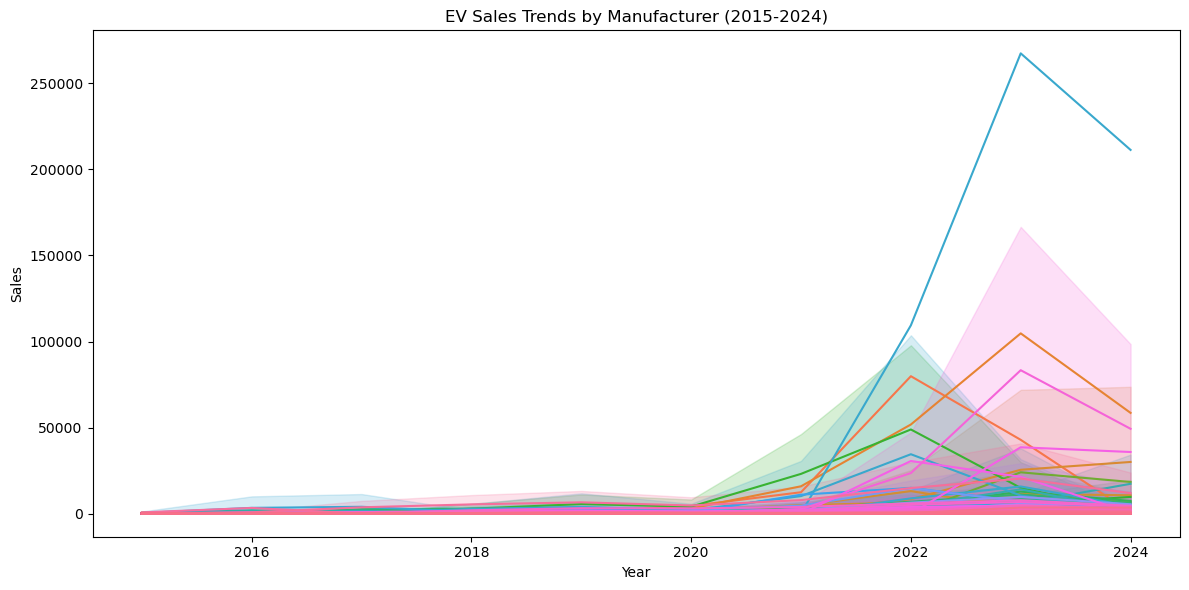

In [31]:
df_long = df_2.melt(id_vars=['Cat', 'Maker'], var_name='Year', value_name='Sales')
df_long['Year'] = df_long['Year'].astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Year', y='Sales', hue='Maker',legend=False)
plt.title('EV Sales Trends by Manufacturer (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Sales')
# plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

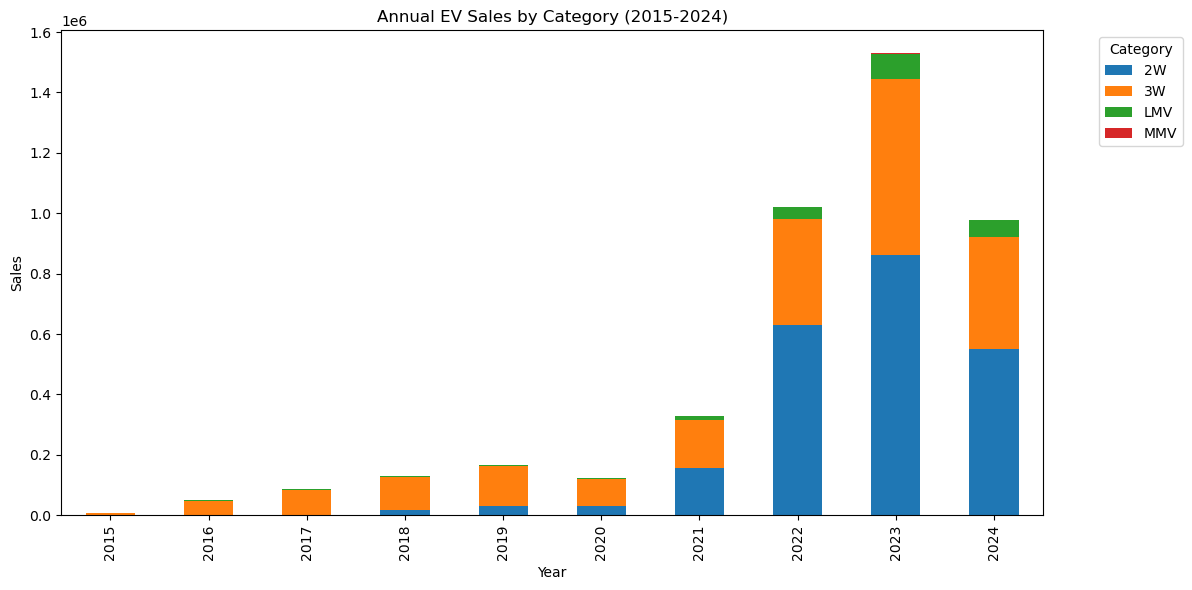

In [26]:
category_sales = df_long.groupby(['Year', 'Cat'])['Sales'].sum().unstack().fillna(0)

category_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Annual EV Sales by Category (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


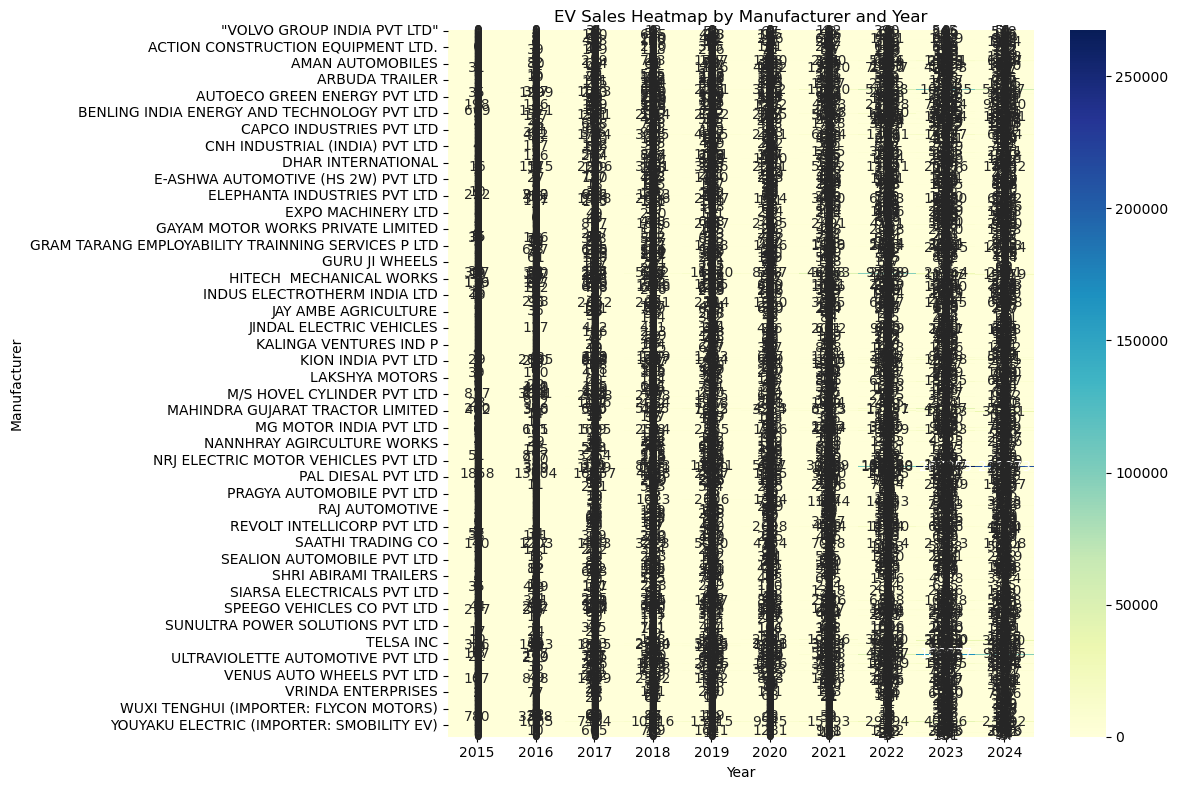

In [27]:
heatmap_data = df_long.pivot_table(index='Maker', columns='Year', values='Sales', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('EV Sales Heatmap by Manufacturer and Year')
plt.xlabel('Year')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()
